In [46]:
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [47]:
from konlpy.tag import Okt
import operator

In [48]:
new1 ='''21대 국회 마지막 본회의에서 해병대 채 상병 특검법이 최종 부결됐다. 국민 다수는 특검이 필요하다고 했지만 윤석열 대통령이 재의요구권(거부권)을 행사한 데 이어 여당이 반대 당론으로 재표결에 임해 법안 통과를 저지했다. 야당은 “여당이 국민의 목소리를 짓밟았다”며 22대 국회에서 채 상병 특검법을 1호 법안으로 다시 발의해 통과시키겠다고 밝혔다.
국회는 28일 본회의에서 재석 294인 중 찬성 179표, 반대 111표, 무효 4표로 ‘순직 해병 수사 방해 및 사건 은폐 등의 진상규명을 위한 특별검사의 임명 등에 관한 법률안’ 재의의 건을 부결시켰다. 이로써 채 상병 특검법은 자동 폐기됐다.
대통령이 거부권을 행사해 국회로 돌려보낸 법안을 다시 통과시키려면 재적 의원 과반 출석에 출석 의원 3분의 2 이상 찬성이 필요하다. 더불어민주당과 정의당 등 야당 의원들과 함께 국민의힘에서 김웅·안철수·유의동·최재형·김근태 의원 등이 당론에 반해 찬성했지만 의결 조건을 채우지 못했다.
국민의힘은 본회의 직전 의원총회에서 반대를 당론으로 정해 부결을 이끌었다. 특검법 처리에 국민 60% 이상이 찬성한다는 여론조사 결과가 잇따랐지만 여당은 받아들이지 않았다. 원내 지도부가 일대일 접촉으로 총선에 낙선·낙천한 의원들의 참석을 독려해 여당 의원 전원이 표결에 참여했다.
특검법은 지난해 7월 수해 실종자 수색 중 순직한 해병대원 사건 조사 과정에서 대통령실의 외압이 있었는지 등을 규명하는 내용이다. 야당이 지난해 9월 발의해 신속처리안건(패스트트랙)으로 지정했다. 지난 2일 본회의에서 야당 단독으로 통과, 지난 21일 대통령의 거부권 행사를 거쳐 이날 재표결이 이뤄졌다. 야당들은 윤석열 대통령이 포함된 권력형 게이트라며 특검이 필요하다고 주장했는데 국민의힘은 민주당의 대통령 탄핵 의도, 고위공직자범죄수사처(공수처) 가 수사 진행 중인 점 등을 이유로 반대했다.
추경호 국민의힘 원내대표는 부결 후 “의원들이 당론으로 정한 사안에 단일대오로 투표해주셨다”며 “공수처 등 수사기관에서 신속하고 엄정하게 수사 결과를 내주시길 기대한다”고 밝혔다.
민주당·정의당·새로운미래·조국혁신당·기본소득당·진보당 등 야 6당 의원들은 부결 후 규탄대회에서 “특검을 거부하는 자가 범인”, “국민의 명령 거부한 국민의힘 규탄한다” 등 구호를 외쳤다. 박찬대 민주당 원내대표는 “한 줌의 권력을 지키기 위해 국민 목소리를 짓밟은 의회 참사의 날”이라며 “22대 국회가 열리자마자 채 상병 특검법을 재추진하겠다”고 밝혔다. 허은아 개혁신당 대표는 기자회견에서 “역사의 법정이 반대표를 던진 의원들을 심판할 것”이라고 말했다.
22대 국회에선 여당이 108석, 범야권 192석으로 여당에서 8명만 이탈해도 대통령의 거부권을 무력화할 수 있다.
국회는 이날 본회의에서 민주당 등 야당 주도로 전세사기 특별법을 재석 170명에 찬성 170표 만장일치로 가결시켰다. 정부가 전세사기 피해자를 먼저 구제하고, 차후에 집을 처분해 회수하는 ‘선 구제 후 회수’가 주요 내용이다. 윤석열 대통령은 21대 국회 임기 마지막 날인 29일까지 법안이 정부로 이송되면 거부권을 행사할 방침 인 것으로 알려졌다.
'''

In [49]:
okt = Okt()
# 명사 부분만 추출
n_list = okt.nouns(new1)

In [50]:
n_list

['국회',
 '마지막',
 '본회의',
 '해병대',
 '채',
 '상병',
 '특검법',
 '최종',
 '부결',
 '국민',
 '다수',
 '특검',
 '윤석열',
 '대통령',
 '재의',
 '요구',
 '거부권',
 '행사',
 '데',
 '여당',
 '반대',
 '당론',
 '재',
 '표결',
 '임해',
 '법안',
 '통과',
 '저지',
 '야당',
 '여당',
 '국민',
 '목소리',
 '며',
 '국회',
 '채',
 '상병',
 '특검법',
 '호',
 '법안',
 '다시',
 '발의',
 '통과',
 '국회',
 '본회의',
 '재석',
 '인',
 '중',
 '찬성',
 '표',
 '반대',
 '표',
 '무효',
 '표',
 '순직',
 '해병',
 '수사',
 '방해',
 '및',
 '사건',
 '은폐',
 '등',
 '진상',
 '규명',
 '위',
 '특별검사',
 '임명',
 '등',
 '관',
 '법률',
 '안',
 '재의',
 '건',
 '부결',
 '채',
 '상병',
 '특검법',
 '자동',
 '폐기',
 '대통령',
 '거부권',
 '행사',
 '국회',
 '법안',
 '다시',
 '통과',
 '재적',
 '의원',
 '과반',
 '출석',
 '출석',
 '의원',
 '이상',
 '찬성',
 '민주당',
 '정의당',
 '등',
 '야당',
 '의원',
 '국민',
 '힘',
 '김웅',
 '안철수',
 '유의',
 '최재형',
 '김근태',
 '의원',
 '등',
 '당론',
 '찬성',
 '의결',
 '조건',
 '국민',
 '힘',
 '본회의',
 '직전',
 '의원',
 '총회',
 '반대',
 '당론',
 '정해',
 '부결',
 '특검법',
 '처리',
 '국민',
 '이상',
 '찬성',
 '여론조사',
 '결과',
 '여당',
 '원내',
 '지도',
 '부가',
 '일대일',
 '접촉',
 '총선',
 '낙선',
 '낙천',
 '의원',
 '참석',
 '독려',
 '여당',
 '의원',
 '전원

In [51]:
import matplotlib.pyplot as plt
from wordcloud import wordcloud

In [52]:
# counter = {}
# for n in n_list:
#     if n not in counter: #카운터안에 '국회'라는 단어가 있는지 확인
#         if len(n) <= 1: 
#             continue   # 길이가 1글자는 제외
#         counter[n] = 0 #{ '국회':0,  '마지막':0 }
#     counter[n] += 1    #{ '국회':2  '마지막':1 }

In [53]:
# counter 횟수 정렬
# operator.itemgetter(1) : 두번째의 데이터로 정렬기준, 나온 횟수 기준
# reverse=True : 역순정렬
counter2 = sorted(counter.items(),key=operator.itemgetter(1),reverse=True)

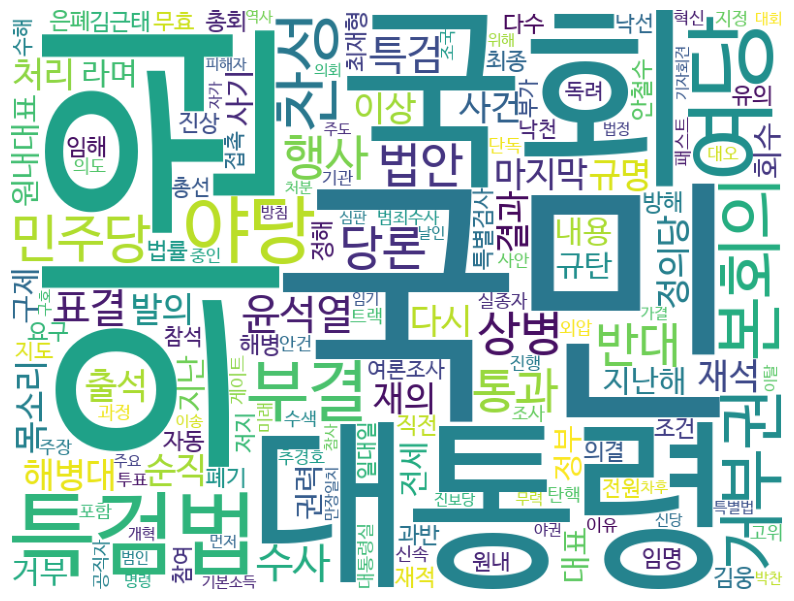

In [54]:
# wordcloud는 한글지원이 안된다..
font_path = 'NanumBarunGothic.ttf'

wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(counter2))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

In [55]:
# counter  함수
from collections import Counter
count = Counter(n_list)
tags = count.most_common(30) # 상위 30개만 노출

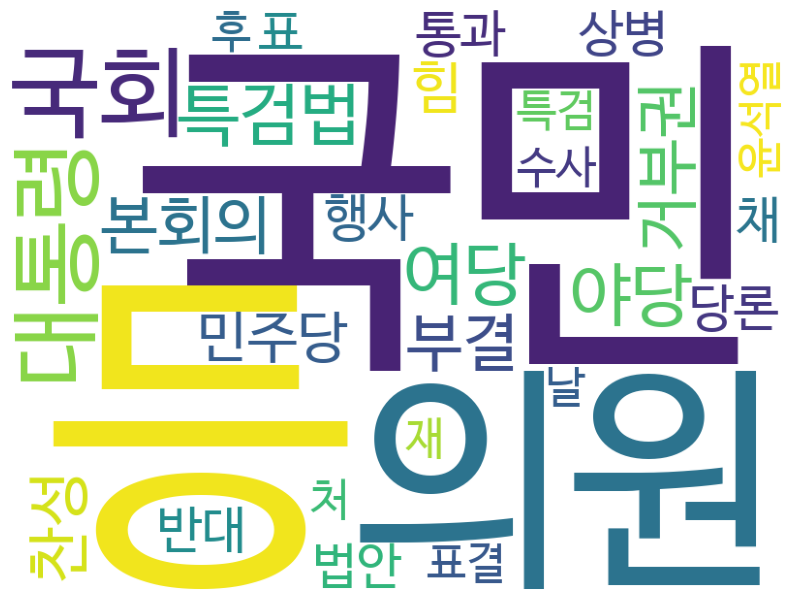

In [56]:
font_path = 'NanumBarunGothic.ttf'

wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

In [57]:
tags

[('국민', 10),
 ('등', 10),
 ('의원', 10),
 ('국회', 8),
 ('대통령', 7),
 ('특검법', 6),
 ('여당', 6),
 ('야당', 6),
 ('본회의', 5),
 ('부결', 5),
 ('거부권', 5),
 ('찬성', 5),
 ('민주당', 5),
 ('힘', 5),
 ('채', 4),
 ('상병', 4),
 ('행사', 4),
 ('반대', 4),
 ('당론', 4),
 ('법안', 4),
 ('통과', 4),
 ('표', 4),
 ('특검', 3),
 ('윤석열', 3),
 ('재', 3),
 ('표결', 3),
 ('수사', 3),
 ('날', 3),
 ('처', 3),
 ('후', 3)]

In [58]:
count

Counter({'국민': 10,
         '등': 10,
         '의원': 10,
         '국회': 8,
         '대통령': 7,
         '특검법': 6,
         '여당': 6,
         '야당': 6,
         '본회의': 5,
         '부결': 5,
         '거부권': 5,
         '찬성': 5,
         '민주당': 5,
         '힘': 5,
         '채': 4,
         '상병': 4,
         '행사': 4,
         '반대': 4,
         '당론': 4,
         '법안': 4,
         '통과': 4,
         '표': 4,
         '특검': 3,
         '윤석열': 3,
         '재': 3,
         '표결': 3,
         '수사': 3,
         '날': 3,
         '처': 3,
         '후': 3,
         '마지막': 2,
         '해병대': 2,
         '재의': 2,
         '목소리': 2,
         '며': 2,
         '다시': 2,
         '발의': 2,
         '재석': 2,
         '인': 2,
         '중': 2,
         '순직': 2,
         '사건': 2,
         '규명': 2,
         '출석': 2,
         '이상': 2,
         '정의당': 2,
         '처리': 2,
         '결과': 2,
         '지난해': 2,
         '내용': 2,
         '지난': 2,
         '권력': 2,
         '라며': 2,
         '원내대표': 2,
         '고': 2,
      

In [59]:
counter2

[('국민', 10),
 ('의원', 10),
 ('국회', 8),
 ('대통령', 7),
 ('특검법', 6),
 ('여당', 6),
 ('야당', 6),
 ('본회의', 5),
 ('부결', 5),
 ('거부권', 5),
 ('찬성', 5),
 ('민주당', 5),
 ('상병', 4),
 ('행사', 4),
 ('반대', 4),
 ('당론', 4),
 ('법안', 4),
 ('통과', 4),
 ('특검', 3),
 ('윤석열', 3),
 ('표결', 3),
 ('수사', 3),
 ('마지막', 2),
 ('해병대', 2),
 ('재의', 2),
 ('목소리', 2),
 ('다시', 2),
 ('발의', 2),
 ('재석', 2),
 ('순직', 2),
 ('사건', 2),
 ('규명', 2),
 ('출석', 2),
 ('이상', 2),
 ('정의당', 2),
 ('처리', 2),
 ('결과', 2),
 ('지난해', 2),
 ('내용', 2),
 ('지난', 2),
 ('권력', 2),
 ('라며', 2),
 ('원내대표', 2),
 ('규탄', 2),
 ('거부', 2),
 ('대표', 2),
 ('전세', 2),
 ('사기', 2),
 ('정부', 2),
 ('구제', 2),
 ('회수', 2),
 ('최종', 1),
 ('다수', 1),
 ('요구', 1),
 ('임해', 1),
 ('저지', 1),
 ('무효', 1),
 ('해병', 1),
 ('방해', 1),
 ('은폐', 1),
 ('진상', 1),
 ('특별검사', 1),
 ('임명', 1),
 ('법률', 1),
 ('자동', 1),
 ('폐기', 1),
 ('재적', 1),
 ('과반', 1),
 ('김웅', 1),
 ('안철수', 1),
 ('유의', 1),
 ('최재형', 1),
 ('김근태', 1),
 ('의결', 1),
 ('조건', 1),
 ('직전', 1),
 ('총회', 1),
 ('정해', 1),
 ('여론조사', 1),
 ('원내', 1),
 ('지도', 1),
 ('부가'

클라우드 그리기